<a href="https://colab.research.google.com/github/bgrodrig/DSCI352/blob/main/DSCI_HW_2_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Beatriz Rodriguez
# DSCI 352 HW#2
# Question 4

In [1]:
from google.colab import files

In [2]:
import pandas as pd
import io

In [6]:
# Credit: https://github.com/christianversloot/machine-learning-articles/blob/main/linking-maths-and-intuition-rosenblatts-perceptron-in-python.md?plain=1

import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [86]:
from mlxtend.plotting import plot_decision_regions

In [3]:
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [57]:
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [58]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
# check what unique target values there are
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [60]:
# focus only on the two required target values
df = df[df["Species"] != "Iris-virginica"]

In [61]:
# create a 0,1 binary column for the target data
s = [0 if df.loc[i, "Species"] == "Iris-setosa" else 1 for i in range(len(df))]

In [62]:
df["Target"] = s

In [63]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,1
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,1
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,1
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,1
99,100,5.7,2.8,4.1,1.3,Iris-versicolor,1


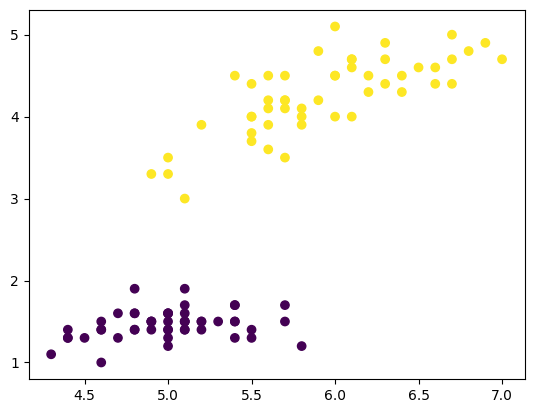

In [64]:
plt.scatter(df['SepalLengthCm'], df['PetalLengthCm'], c=df["Target"])
plt.show()

In [75]:
# define X values for training - Sepal Length and Petal Length
X = pd.DataFrame(df.loc[:, "SepalLengthCm"])
X["PetalLengthCm"] = df.loc[:, "PetalLengthCm"]
# X

In [76]:
# define T target values
T = df.loc[:, "Target"]
# T

In [82]:
X = X.astype(float).to_numpy()
T = T.astype(int).to_numpy()

In [71]:
# Rosenblatt Perceptron

# Basic Rosenblatt Perceptron implementation
class RBPerceptron():

  # Constructor object, self is the instance of the object NeuralNetwork itself
  def __init__(self, number_of_epochs = 100, learning_rate = 0.1):
    self.number_of_epochs = number_of_epochs
    self.learning_rate = learning_rate

  # Train perceptron
  def train(self, X, T):
    # Initialize weights vector with zeroes
    num_features = X.shape[1]
    self.w = np.zeros(num_features + 1)
    # Perform the epochs
#    diff = []
#    err = []
    for i in range(self.number_of_epochs):
#      err.append(sum(diff))
#      print(err)
      # For every combination of (X_i, T_i), zip creates the tuples
      for sample, desired_outcome in zip(X, T):
        # Generate prediction and compare with desired outcome
        prediction    = self.predict(sample)
        difference    = (desired_outcome - prediction)
#        diff.append(difference)
        # Compute weight update via Perceptron Learning Rule
        self.w[1:]    += self.learning_rate * difference * sample
        self.w[0]     += self.learning_rate * difference * 1
    return self

  # Generate prediction
  def predict(self, sample):
    # dot product:
    outcome = np.dot(sample, self.w[1:]) + self.w[0]
    # Activation function:
    return np.where(outcome > 0, 1, 0)

In [72]:
# ks = [100,200,300,400,500,600,700, 800, 900, 1000]
ks = [100, 200, 300, 500]
colors = ['blue','limegreen','cyan','red']

/tmp/ipython-input-891077399.py:6: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X, T.astype(np.integer), clf=trained_model, legend=0)


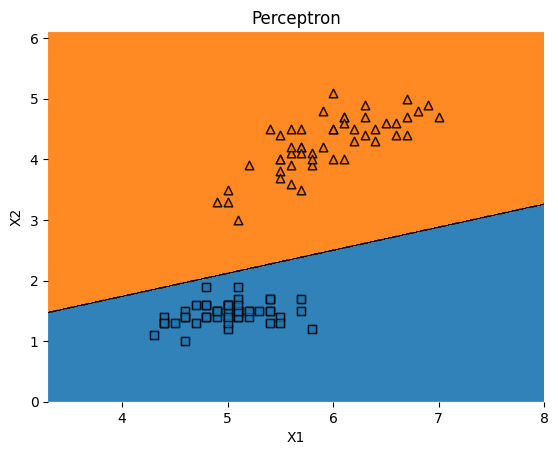

In [87]:
# train and predict values based on Sepal Length and Petal Length
# plot decision boundary results
for k in ks:
  # print(k)
  rbp = RBPerceptron(k, 0.1)
  trained_model = rbp.train(X, T)

  plot_decision_regions(X, T.astype(np.integer), clf=trained_model, legend=0)

plt.title('Perceptron')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

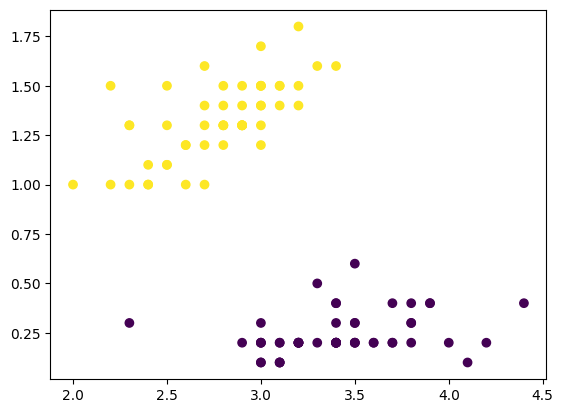

In [88]:
plt.scatter(df['SepalWidthCm'], df['PetalWidthCm'], c=df["Target"])
plt.show()

In [89]:
# define X values for training - Sepal Width and Petal Width
X2 = pd.DataFrame(df.loc[:, "SepalWidthCm"])
X2["PetalWidthCm"] = df.loc[:, "PetalWidthCm"]
# X

In [90]:
X2 = X2.astype(float).to_numpy()

/tmp/ipython-input-2602590100.py:6: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X2, T.astype(np.integer), clf=trained_model, legend=0)


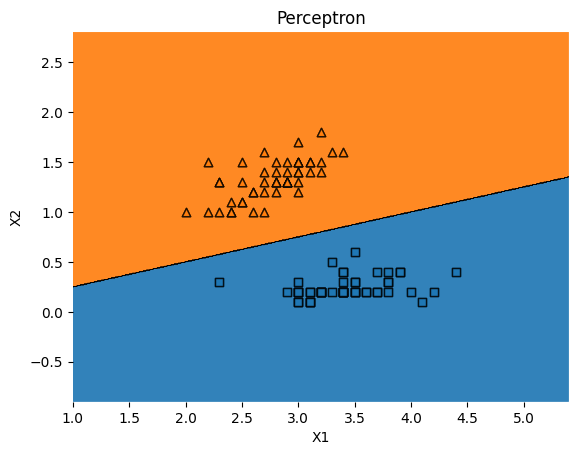

In [93]:
# train and predict values based on Sepal Width and Petal Width
# plot decision boundary results
for k in ks:
  # print(k)
  rbp = RBPerceptron(k, 0.1)
  trained_model = rbp.train(X2, T)

  plot_decision_regions(X2, T.astype(np.integer), clf=trained_model, legend=0)

plt.title('Perceptron')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()